### Avaliação semana 2

Nesse documento contém o código usado para treinar o modelo Fashion MNIST com no minimo 90% de acurácia

Nome: João Victor Cordeiro

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dados
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [ ]:
# Separa entre dados de treinamento e validação
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full
)

In [4]:
# Adiciona canal para CNN
X_train = X_train[..., tf.newaxis]
X_valid = X_valid[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

In [ ]:
# Cria as camadas do modelo na arquitetura CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Visualiza a estrutura do modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,869,002 (7.13 MB)

 Trainable params: 1,868,234 (7.13 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# Compilando o modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
# Treinando o modelo
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[
        keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)

Epoch 1/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 171s 190ms/step - accuracy: 0.7362 - loss: 0.8350 - val_accuracy: 0.8902 - val_loss: 0.2982
Epoch 2/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 163s 190ms/step - accuracy: 0.8606 - loss: 0.3910 - val_accuracy: 0.9076 - val_loss: 0.2448
Epoch 3/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 203s 190ms/step - accuracy: 0.8827 - loss: 0.3244 - val_accuracy: 0.9198 - val_loss: 0.2177
Epoch 4/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 163s 189ms/step - accuracy: 0.8986 - loss: 0.2842 - val_accuracy: 0.9278 - val_loss: 0.2102
Epoch 5/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 162s 189ms/step - accuracy: 0.9037 - loss: 0.2624 - val_accuracy: 0.9282 - val_loss: 0.2060
Epoch 6/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 163s 189ms/step - accuracy: 0.9132 - loss: 0.2411 - val_accuracy: 0.9330 - val_loss: 0.1889
Epoch 7/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 161s 187ms/step - accuracy: 0.9160 - loss: 0.2291 - val_accuracy: 0.9318 - val_loss: 0.1870
Epoch 8/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 161s 187ms/step - accuracy: 0.9216 -

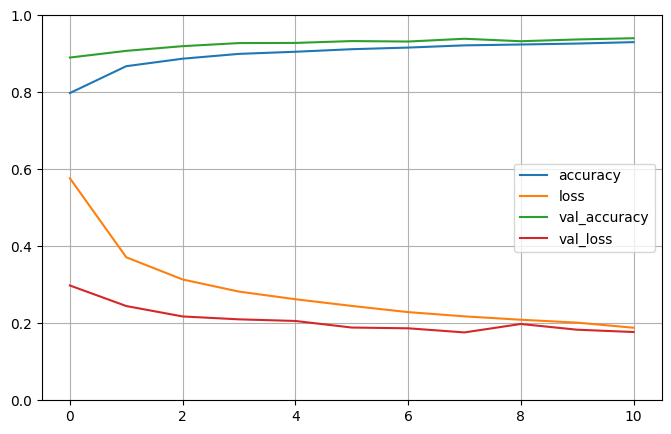

In [10]:
# Visualiza o gráfico com métricas do treinamento
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# Testa a eficacia do modelo
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9246 - loss: 0.2093


[0.20606814324855804, 0.9236000180244446]

In [13]:
# Salva o modelo para usar futuramente com load_model()
model.save("./data/model_92_percent.h5")